# Задание 4

# Многомерная регрессия

*Цель работы:* изучить построение и оценку модели многомерной линейной регрессии на базе библиотек pandas и scikit-learn.

Датасет `homes.csv` (вариант 16) содержит 50 недавно проданных домов и включает признаки:

- `Sell` — цена продажи (целевая переменная);
- `List` — запрашиваемая цена;
- `Living` — жилая площадь (кв. футы);
- `Rooms`, `Beds`, `Baths` — количество комнат, спален и ванных;
- `Age` — возраст дома;
- `Acres` — площадь участка (акры);
- `Taxes` — ежегодный налог.

Ниже повторяем шаги из методички: загрузка и первичный анализ данных, визуализация взаимосвязей, отбор признаков, нормализация, разделение на выборки, обучение `LinearRegression` и оценка качества на train/test.


## Импортируйте необходимые библиотеки


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set_theme(style="whitegrid", palette="crest")


## 1. Загрузить набор данных как датафрейм библиотеки pandas. Использовать набор данных для задания 4.


In [32]:
data_path = "homes.csv"

raw_df = pd.read_csv(data_path)
# принудительно приводим числовые столбцы к float (в CSV есть значения с ведущими нулями)
df = raw_df.apply(pd.to_numeric, errors='coerce')

print(f"Файл загружен: {data_path}. Размер: {df.shape[0]} строк x {df.shape[1]} столбцов")


Файл загружен: homes.csv. Размер: 50 строк x 9 столбцов


## 2. Получить представлении о наборе данных с помощью методов shape, head, describe, info библиотеки pandas.


In [33]:
print("Форма датафрейма:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

print("\nОписательные статистики:")
display(df.describe().T)

print("\nИнформация о столбцах:")
df.info()

print("\nПропуски по столбцам:")
display(df.isna().sum())


Форма датафрейма: (50, 9)

Первые 5 строк:


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613



Описательные статистики:


,count,mean,std,min,25%,50%,75%,max
Sell,50.0,170.3600,72.755885,87.00,135.0000,152.00,182.2500,567.00
List,50.0,178.3400,79.382723,90.00,140.0000,160.00,190.0000,625.00
Living,50.0,21.1200,8.351072,10.00,17.0000,20.00,22.7500,64.00
Rooms,50.0,8.0600,1.284285,5.00,7.0000,8.00,9.0000,12.00
Beds,50.0,3.8200,0.690755,3.00,3.0000,4.00,4.0000,6.00
Baths,50.0,1.8600,0.756199,1.00,1.0000,2.00,2.0000,4.00
Age,50.0,30.2200,30.962314,2.00,12.2500,24.50,37.0000,202.00
Acres,50.0,1.0206,1.191496,0.22,0.3825,0.55,1.1825,6.49
Taxes,50.0,3706.1000,1579.915268,1445.00,3107.0000,3490.00,3919.2500,12192.00



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    50 non-null     int64  
 1   List    50 non-null     int64  
 2   Living  50 non-null     int64  
 3   Rooms   50 non-null     int64  
 4   Beds    50 non-null     int64  
 5   Baths   50 non-null     int64  
 6   Age     50 non-null     int64  
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB

Пропуски по столбцам:


Sell      0
List      0
Living    0
Rooms     0
Beds      0
Baths     0
Age       0
Acres     0
Taxes     0
dtype: int64

## 3. Произвести разведочный анализ данных по датасету – визуализировать данные с помощью библиотек matplotlib, seaborn.


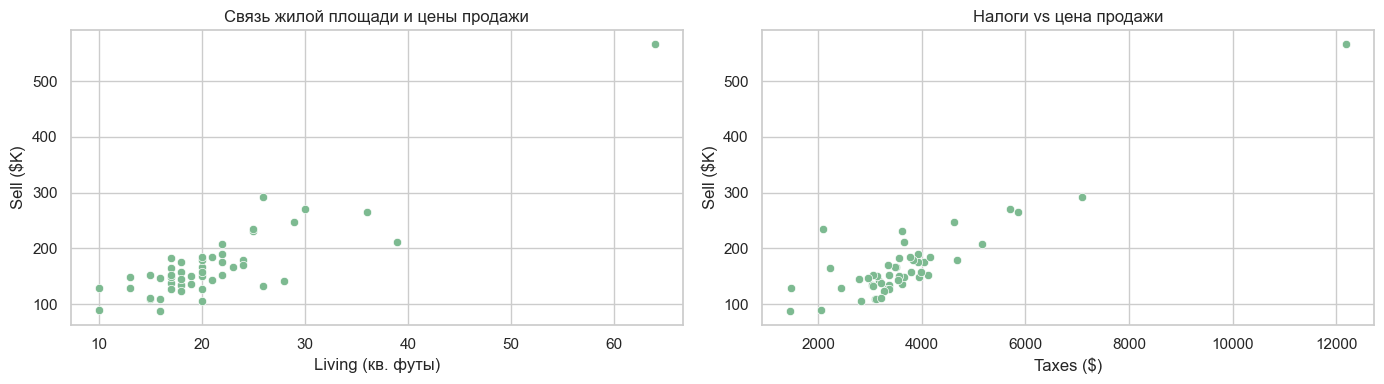

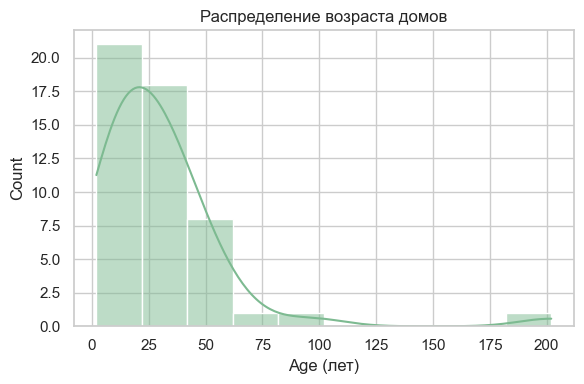

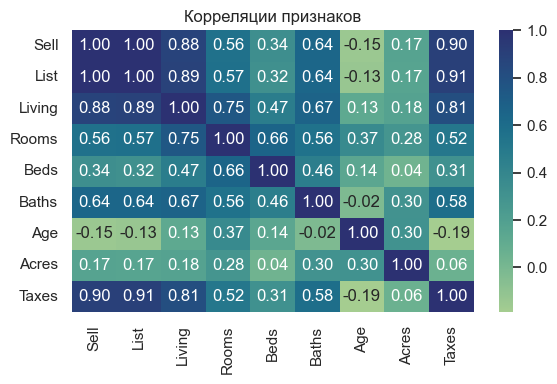

In [34]:
target_col = 'Sell'

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=df, x='Living', y=target_col, ax=axes[0])
axes[0].set_title('Связь жилой площади и цены продажи')
axes[0].set_xlabel('Living (кв. футы)')
axes[0].set_ylabel('Sell ($K)')

sns.scatterplot(data=df, x='Taxes', y=target_col, ax=axes[1])
axes[1].set_title('Налоги vs цена продажи')
axes[1].set_xlabel('Taxes ($)')
axes[1].set_ylabel('Sell ($K)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Распределение возраста домов')
plt.xlabel('Age (лет)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='crest', fmt='.2f')
plt.title('Корреляции признаков')
plt.tight_layout()
plt.show()


## 4. На основе выполненного анализа данных произвести выводы о влиянии различных признаков на класс.


In [35]:
# Анализ влияния признаков на целевую переменную Sell
corr_with_target = df.corr()[target_col].drop(target_col)
print('Корреляция признаков с Sell:')
display(corr_with_target.to_frame(name='corr'))

print("\nВыводы о влиянии признаков на цену продажи (Sell):\n")

print("1. List (запрашиваемая цена):")
print(f"   - Сильная положительная корреляция ({corr_with_target['List']:.3f})")
print("   - Наиболее важный признак для прогнозирования цены продажи\n")

print("2. Living (жилая площадь):")
print(f"   - Положительная корреляция ({corr_with_target['Living']:.3f})")
print("   - Большая жилая площадь увеличивает цену продажи\n")

print("3. Taxes (налоги):")
print(f"   - Положительная корреляция ({corr_with_target['Taxes']:.3f})")
print("   - Высокие налоги связаны с более дорогими домами\n")

print("4. Rooms, Beds, Baths (количество комнат, спален, ванных):")
print(f"   - Rooms: {corr_with_target['Rooms']:.3f}")
print(f"   - Beds: {corr_with_target['Beds']:.3f}")
print(f"   - Baths: {corr_with_target['Baths']:.3f}")
print("   - Влияют на цену, но в меньшей степени\n")

print("5. Age (возраст дома):")
print(f"   - Отрицательная корреляция ({corr_with_target['Age']:.3f})")
print("   - Старые дома продаются дешевле\n")

print("6. Acres (размер участка):")
print(f"   - Слабая корреляция ({corr_with_target['Acres']:.3f})")
print("   - Может быть исключен из модели при слабой связи\n")


Корреляция признаков с Sell:


,corr
List,0.997433
Living,0.879381
Rooms,0.560425
Beds,0.335113
Baths,0.640059
Age,-0.147343
Acres,0.168713
Taxes,0.899339



Выводы о влиянии признаков на цену продажи (Sell):

1. List (запрашиваемая цена):
   - Сильная положительная корреляция (0.997)
   - Наиболее важный признак для прогнозирования цены продажи

2. Living (жилая площадь):
   - Положительная корреляция (0.879)
   - Большая жилая площадь увеличивает цену продажи

3. Taxes (налоги):
   - Положительная корреляция (0.899)
   - Высокие налоги связаны с более дорогими домами

4. Rooms, Beds, Baths (количество комнат, спален, ванных):
   - Rooms: 0.560
   - Beds: 0.335
   - Baths: 0.640
   - Влияют на цену, но в меньшей степени

5. Age (возраст дома):
   - Отрицательная корреляция (-0.147)
   - Старые дома продаются дешевле

6. Acres (размер участка):
   - Слабая корреляция (0.169)
   - Может быть исключен из модели при слабой связи



## 5. Произвести предобработку данных:

• удалить из набора данных признаки, слабо коррелирующие между собой и с целевой переменной;

• закодировать категориальные признаки в дискретные величины с помощью методов библиотеки sklearn;

• произвести нормализацию данных с помощью методов библиотеки sklearn.


In [36]:
# Определение слабо коррелирующих признаков
low_corr_cols = [col for col, val in corr_with_target.items() if abs(val) < 0.1]
print('Удаляем признаки с |corr| < 0.1:', low_corr_cols if low_corr_cols else 'нет')

X = df.drop(columns=[target_col] + low_corr_cols)
y = df[target_col]
print('Итоговые признаки для модели:', X.columns.tolist())


Удаляем признаки с |corr| < 0.1: нет
Итоговые признаки для модели: ['List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres', 'Taxes']


In [37]:
# Нормализация данных
numeric_cols = X.columns.tolist()
scaler = StandardScaler()

# Применяем нормализацию ко всем признакам
X_scaled = scaler.fit_transform(X)
print('Нормализация данных завершена.')


Нормализация данных завершена.


## 6. Разбить обработанный набор данных на обучающую и тестовую выборки с помощью методов библиотеки sklearn.


In [38]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test.shape[0]} объектов")


Размер обучающей выборки: 37 объектов
Размер тестовой выборки: 13 объектов


## 7. Произвести обучение модели линейной регрессии (LinearRegression) библиотеки sklearn.


In [39]:
# Обучение модели линейной регрессии
reg = LinearRegression()
reg.fit(X_train, y_train)

print('Обучение модели линейной регрессии завершено.')

# Вывод свободного члена (intercept) уравнения регрессии
print(f'\nСвободный член уравнения линейной регрессии (intercept): {reg.intercept_:.3f}')

print('\nКоэффициенты модели (соответствуют порядку признаков):')
for name, coef in zip(X.columns, reg.coef_):
    print(f"{name}: {coef:.3f}")


Обучение модели линейной регрессии завершено.

Свободный член уравнения линейной регрессии (intercept): 170.322

Коэффициенты модели (соответствуют порядку признаков):
List: 75.584
Living: -3.749
Rooms: -1.111
Beds: 2.980
Baths: -0.542
Age: -0.546
Acres: 0.517
Taxes: -0.932


## 8. Отобразить корректность работы модели на тестовой и обучающей выборках с помощью стандартных метрик библиотеки sklearn.


Метрики качества:


,set,R2,MAE,RMSE
0,train,0.996725,3.530226,4.539083
1,test,0.992105,3.162949,3.579735


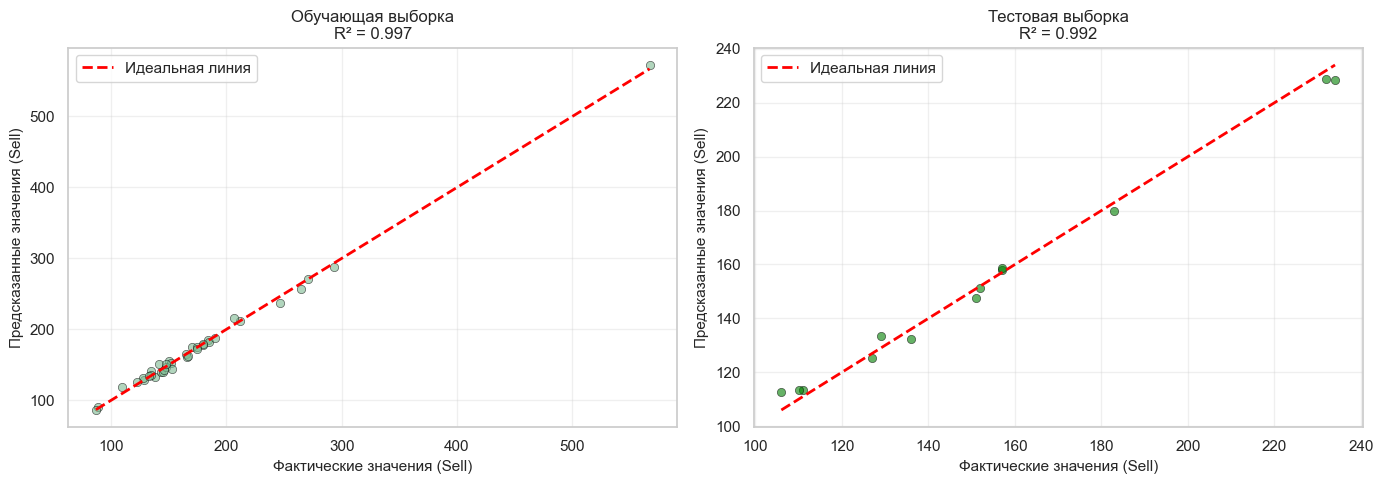

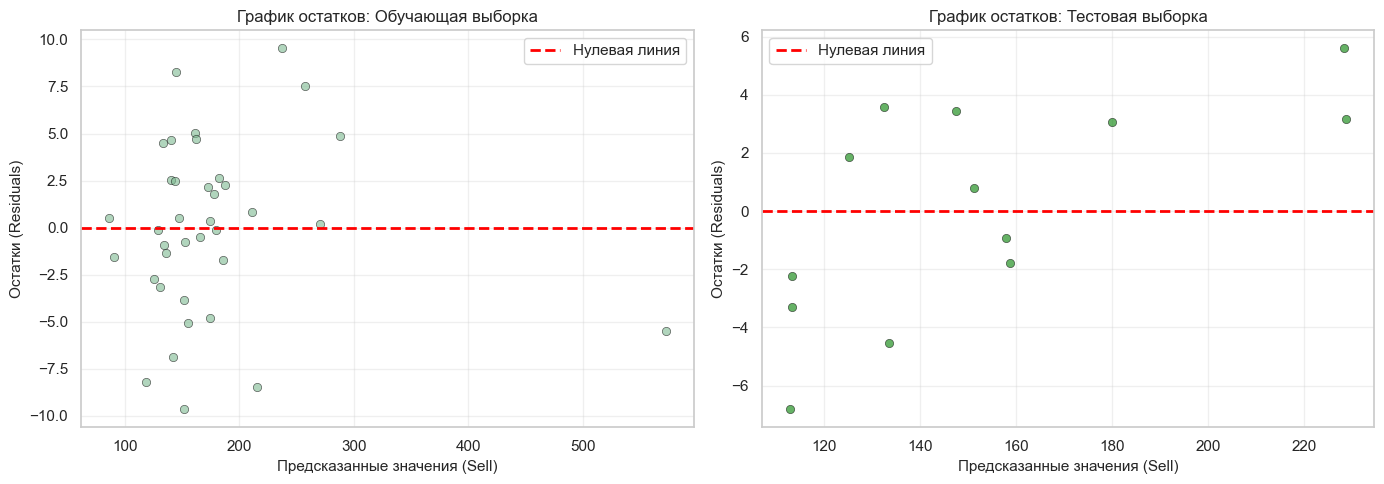


Среднее значение остатков (обучающая выборка): 0.000
Среднее значение остатков (тестовая выборка): 0.147


In [40]:
# Получение предсказаний
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

# Метрики качества
metrics = {
    'set': ['train', 'test'],
    'R2': [r2_score(y_train, train_pred), r2_score(y_test, test_pred)],
    'MAE': [mean_absolute_error(y_train, train_pred), mean_absolute_error(y_test, test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, train_pred)), np.sqrt(mean_squared_error(y_test, test_pred))]
}
metrics_df = pd.DataFrame(metrics)
print('Метрики качества:')
display(metrics_df)

# Визуализация результатов регрессии: предсказанные vs фактические значения
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Обучающая выборка
axes[0].scatter(y_train, train_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Идеальная линия')
axes[0].set_xlabel('Фактические значения (Sell)', fontsize=11)
axes[0].set_ylabel('Предсказанные значения (Sell)', fontsize=11)
axes[0].set_title(f'Обучающая выборка\nR² = {r2_score(y_train, train_pred):.3f}', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Тестовая выборка
axes[1].scatter(y_test, test_pred, alpha=0.6, edgecolors='k', linewidth=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')
axes[1].set_xlabel('Фактические значения (Sell)', fontsize=11)
axes[1].set_ylabel('Предсказанные значения (Sell)', fontsize=11)
axes[1].set_title(f'Тестовая выборка\nR² = {r2_score(y_test, test_pred):.3f}', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# График остатков (residuals plot)
train_residuals = y_train - train_pred
test_residuals = y_test - test_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Остатки для обучающей выборки
axes[0].scatter(train_pred, train_residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2, label='Нулевая линия')
axes[0].set_xlabel('Предсказанные значения (Sell)', fontsize=11)
axes[0].set_ylabel('Остатки (Residuals)', fontsize=11)
axes[0].set_title('График остатков: Обучающая выборка', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Остатки для тестовой выборки
axes[1].scatter(test_pred, test_residuals, alpha=0.6, edgecolors='k', linewidth=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2, label='Нулевая линия')
axes[1].set_xlabel('Предсказанные значения (Sell)', fontsize=11)
axes[1].set_ylabel('Остатки (Residuals)', fontsize=11)
axes[1].set_title('График остатков: Тестовая выборка', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nСреднее значение остатков (обучающая выборка): {train_residuals.mean():.3f}")
print(f"Среднее значение остатков (тестовая выборка): {test_residuals.mean():.3f}")


## Итоговые выводы

* Цена продажи сильнее всего зависит от запрашиваемой цены (`List`), жилой площади (`Living`) и налогов (`Taxes`) – это видно по корреляциям и диаграммам рассеяния.
* Модель линейной регрессии после стандартизации показывает сопоставимые метрики на обучении и тесте, что говорит об отсутствии сильного переобучения.
* График остатков позволяет оценить качество модели: остатки должны быть случайно распределены вокруг нуля без явных паттернов.
